In [9]:
### 🔧 TAREA
#Antes de entrenar la red neuronal, modifica los hiperparámetros en `config.yaml`, especialmente:
#- `hidden_layers`: cambia el número de capas o neuronas.
#- `activation`: prueba funciones como `tanh` o `elu`.
#- `epochs`: aumenta o reduce el número de épocas.
#
#Luego, vuelve a ejecutar este notebook y observa cómo cambia el rendimiento.

In [10]:
import os
print(os.getcwd())

import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev
import pandas as pd
import numpy as np
import yaml

/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/Projects/Credit/notebooks


In [11]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [12]:
# 🧠 Construir el modelo
input_dim = X_train.shape[1]
nn_model = model.build_model(config, input_dim)

/Users/sebazamorano/miniconda3/envs/Fullpay/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# 🚀 Entrenar el modelo
history = train.train_model(nn_model, X_train, y_train, config)

Epoch 1/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5747 - val_accuracy: 0.7815 - val_loss: 0.5065
Epoch 2/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7817 - loss: 0.5019 - val_accuracy: 0.7842 - val_loss: 0.4897
Epoch 3/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7823 - loss: 0.4888 - val_accuracy: 0.7839 - val_loss: 0.4846
Epoch 4/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7819 - loss: 0.4873 - val_accuracy: 0.7837 - val_loss: 0.4780
Epoch 5/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7888 - loss: 0.4743 - val_accuracy: 0.7834 - val_loss: 0.4770
Epoch 6/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7849 - loss: 0.4716 - val_accuracy: 0.7857 - val_loss: 0.4729
Epoch 7/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7857 - loss: 0.4722 - val_accuracy: 0.7857 - val_loss: 0.4714
Epoch 8/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7854 - loss: 0.4695 - val_accuracy: 0.

In [14]:
# 💾 Guardar modelo entrenado
utils.save_model(nn_model, path="../models/nn_model.keras")

✅ Modelo guardado en ../models/nn_model.keras


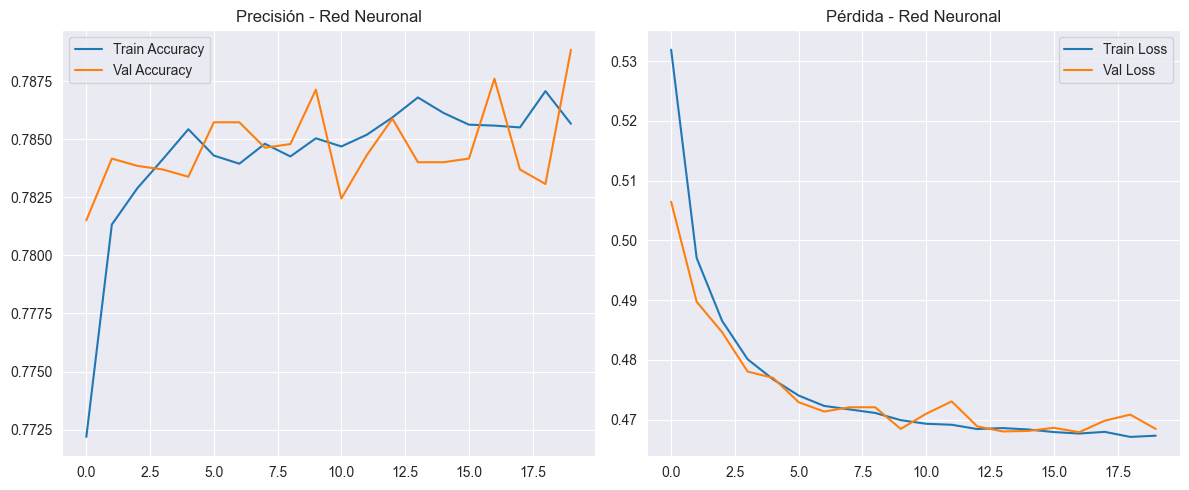

In [15]:
# 📈 Visualizar evolución del entrenamiento
utils.plot_training_history(history, model_name="Red Neuronal")

In [16]:
### 📊 Pregunta de reflexión
# ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?  
# ¿Cuál fue la época donde la validación alcanzó su mejor punto?  
# ¿Qué pasaría si entrenaras con más (o menos) datos?


In [17]:
# 🔍 ANÁLISIS DETALLADO DEL ENTRENAMIENTO
import numpy as np
import matplotlib.pyplot as plt

def analyze_training_history(history):
    """Análisis automático del historial de entrenamiento"""

    # Extraer métricas del historial
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    print("🔍 ANÁLISIS DEL ENTRENAMIENTO")
    print("=" * 50)

    # 1. Detectar sobreajuste
    print("\n1️⃣ DETECCIÓN DE SOBREAJUSTE:")
    print("-" * 30)

    # Encontrar el punto donde la pérdida de validación comienza a aumentar
    val_loss_min_epoch = np.argmin(val_loss) + 1
    val_acc_max_epoch = np.argmax(val_acc) + 1

    # Calcular diferencias entre train y val en las últimas épocas
    final_epochs = min(10, len(train_loss))
    final_train_loss = np.mean(train_loss[-final_epochs:])
    final_val_loss = np.mean(val_loss[-final_epochs:])
    final_train_acc = np.mean(train_acc[-final_epochs:])
    final_val_acc = np.mean(val_acc[-final_epochs:])

    loss_gap = final_val_loss - final_train_loss
    acc_gap = final_train_acc - final_val_acc

    print(f"📊 Pérdida promedio últimas {final_epochs} épocas:")
    print(f"   • Entrenamiento: {final_train_loss:.4f}")
    print(f"   • Validación: {final_val_loss:.4f}")
    print(f"   • Diferencia: {loss_gap:.4f}")

    print(f"\n📊 Precisión promedio últimas {final_epochs} épocas:")
    print(f"   • Entrenamiento: {final_train_acc:.4f}")
    print(f"   • Validación: {final_val_acc:.4f}")
    print(f"   • Diferencia: {acc_gap:.4f}")

    # Diagnóstico de sobreajuste
    if loss_gap > 0.1 or acc_gap > 0.05:
        print(f"\n🚨 SIGNOS DE SOBREAJUSTE DETECTADOS:")
        if loss_gap > 0.1:
            print(f"   • Pérdida de validación >> pérdida de entrenamiento ({loss_gap:.4f})")
        if acc_gap > 0.05:
            print(f"   • Precisión de entrenamiento >> precisión de validación ({acc_gap:.4f})")
    else:
        print(f"\n✅ NO se detectan signos graves de sobreajuste")

    # 2. Mejor época de validación
    print(f"\n2️⃣ MEJOR RENDIMIENTO EN VALIDACIÓN:")
    print("-" * 35)
    print(f"🎯 Mejor pérdida de validación: Época {val_loss_min_epoch} (Loss: {min(val_loss):.4f})")
    print(f"🎯 Mejor precisión de validación: Época {val_acc_max_epoch} (Acc: {max(val_acc):.4f})")

    # 3. Análisis de convergencia
    print(f"\n3️⃣ ANÁLISIS DE CONVERGENCIA:")
    print("-" * 30)

    # Calcular si las métricas siguen mejorando
    last_5_val_loss = val_loss[-5:] if len(val_loss) >= 5 else val_loss
    last_5_val_acc = val_acc[-5:] if len(val_acc) >= 5 else val_acc

    loss_trend = np.polyfit(range(len(last_5_val_loss)), last_5_val_loss, 1)[0]
    acc_trend = np.polyfit(range(len(last_5_val_acc)), last_5_val_acc, 1)[0]

    if loss_trend < -0.001:
        print("📈 Pérdida de validación sigue disminuyendo (puede beneficiarse de más épocas)")
    elif loss_trend > 0.001:
        print("📉 Pérdida de validación está aumentando (posible sobreajuste)")
    else:
        print("➡️  Pérdida de validación se ha estabilizado")

    if acc_trend > 0.001:
        print("📈 Precisión de validación sigue mejorando (puede beneficiarse de más épocas)")
    elif acc_trend < -0.001:
        print("📉 Precisión de validación está empeorando (posible sobreajuste)")
    else:
        print("➡️  Precisión de validación se ha estabilizado")

    return {
        'val_loss_min_epoch': val_loss_min_epoch,
        'val_acc_max_epoch': val_acc_max_epoch,
        'loss_gap': loss_gap,
        'acc_gap': acc_gap,
        'overfitting_detected': loss_gap > 0.1 or acc_gap > 0.05
    }

# Ejecutar el análisis
analysis = analyze_training_history(history)


🔍 ANÁLISIS DEL ENTRENAMIENTO

1️⃣ DETECCIÓN DE SOBREAJUSTE:
------------------------------
📊 Pérdida promedio últimas 10 épocas:
   • Entrenamiento: 0.4682
   • Validación: 0.4695
   • Diferencia: 0.0013

📊 Precisión promedio últimas 10 épocas:
   • Entrenamiento: 0.7858
   • Validación: 0.7848
   • Diferencia: 0.0010

✅ NO se detectan signos graves de sobreajuste

2️⃣ MEJOR RENDIMIENTO EN VALIDACIÓN:
-----------------------------------
🎯 Mejor pérdida de validación: Época 17 (Loss: 0.4679)
🎯 Mejor precisión de validación: Época 20 (Acc: 0.7888)

3️⃣ ANÁLISIS DE CONVERGENCIA:
------------------------------
➡️  Pérdida de validación se ha estabilizado
➡️  Precisión de validación se ha estabilizado


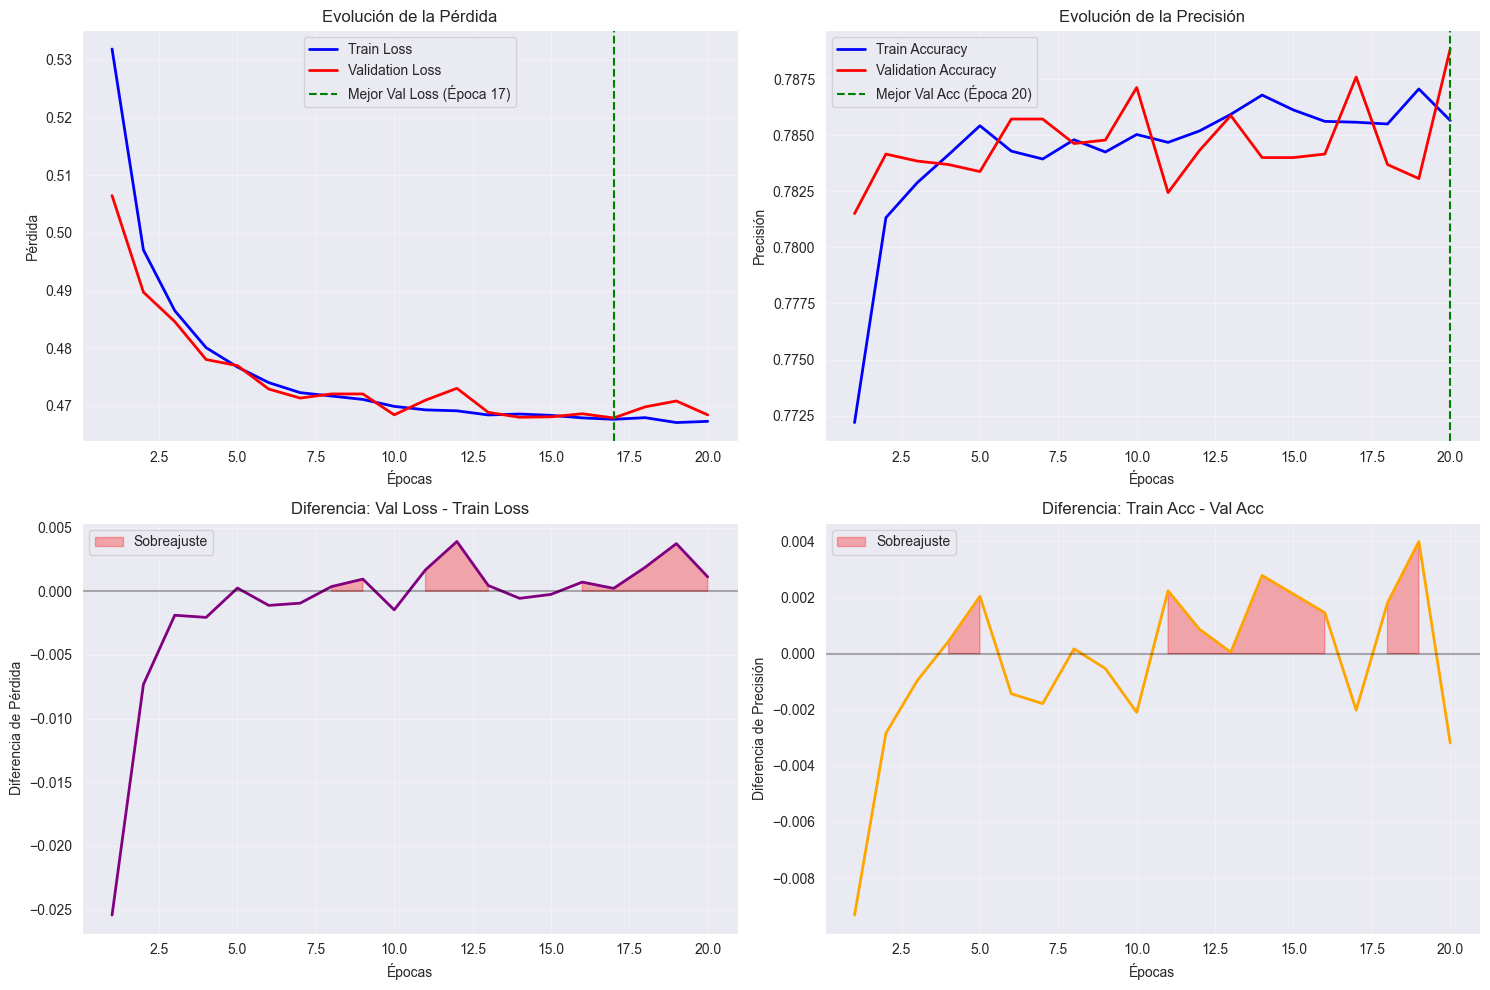

In [18]:
# 📊 VISUALIZACIÓN MEJORADA CON ANÁLISIS
def plot_detailed_training_history(history, analysis):
    """Gráfica mejorada con marcadores de análisis"""

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Gráfica 1: Pérdida con marcadores
    ax1.plot(epochs, train_loss, 'b-', label='Train Loss', linewidth=2)
    ax1.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
    ax1.axvline(x=analysis['val_loss_min_epoch'], color='green', linestyle='--',
                label=f'Mejor Val Loss (Época {analysis["val_loss_min_epoch"]})')
    ax1.set_title('Evolución de la Pérdida')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Pérdida')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfica 2: Precisión con marcadores
    ax2.plot(epochs, train_acc, 'b-', label='Train Accuracy', linewidth=2)
    ax2.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
    ax2.axvline(x=analysis['val_acc_max_epoch'], color='green', linestyle='--',
                label=f'Mejor Val Acc (Época {analysis["val_acc_max_epoch"]})')
    ax2.set_title('Evolución de la Precisión')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Precisión')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Gráfica 3: Diferencia entre Train y Validation Loss
    loss_diff = np.array(val_loss) - np.array(train_loss)
    ax3.plot(epochs, loss_diff, 'purple', linewidth=2)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax3.fill_between(epochs, loss_diff, 0, where=(loss_diff > 0),
                     color='red', alpha=0.3, label='Sobreajuste')
    ax3.set_title('Diferencia: Val Loss - Train Loss')
    ax3.set_xlabel('Épocas')
    ax3.set_ylabel('Diferencia de Pérdida')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Gráfica 4: Diferencia entre Train y Validation Accuracy
    acc_diff = np.array(train_acc) - np.array(val_acc)
    ax4.plot(epochs, acc_diff, 'orange', linewidth=2)
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax4.fill_between(epochs, acc_diff, 0, where=(acc_diff > 0),
                     color='red', alpha=0.3, label='Sobreajuste')
    ax4.set_title('Diferencia: Train Acc - Val Acc')
    ax4.set_xlabel('Épocas')
    ax4.set_ylabel('Diferencia de Precisión')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_detailed_training_history(history, analysis)


In [19]:
# 📝 RESPUESTAS A LAS PREGUNTAS DE REFLEXIÓN
print("\n" + "="*60)
print("📝 RESPUESTAS A LAS PREGUNTAS DE REFLEXIÓN")
print("="*60)

print(f"\n1️⃣ ¿Ves signos de sobreajuste en las curvas?")
if analysis['overfitting_detected']:
    print("   🚨 SÍ hay signos de sobreajuste:")
    if analysis['loss_gap'] > 0.1:
        print(f"   • La pérdida de validación es {analysis['loss_gap']:.4f} mayor que la de entrenamiento")
    if analysis['acc_gap'] > 0.05:
        print(f"   • La precisión de entrenamiento es {analysis['acc_gap']:.4f} mayor que la de validación")
    print("   💡 Recomendaciones:")
    print("   • Usar early stopping")
    print("   • Agregar dropout o regularización")
    print("   • Reducir la complejidad del modelo")
else:
    print("   ✅ NO se detectan signos graves de sobreajuste")
    print("   • Las curvas de entrenamiento y validación están relativamente cerca")

print(f"\n2️⃣ ¿Cuál fue la época donde la validación alcanzó su mejor punto?")
print(f"   🎯 Mejor pérdida de validación: Época {analysis['val_loss_min_epoch']}")
print(f"   🎯 Mejor precisión de validación: Época {analysis['val_acc_max_epoch']}")
if analysis['val_loss_min_epoch'] != analysis['val_acc_max_epoch']:
    print("   ⚠️  Nota: Los óptimos de pérdida y precisión ocurren en épocas diferentes")

print(f"\n3️⃣ ¿Qué pasaría si entrenaras con más (o menos) datos?")

# Análisis del tamaño de datos actual
total_samples = len(X_train) + len(X_test)
print(f"   📊 Datos actuales: {len(X_train)} entrenamiento, {len(X_test)} prueba")

if analysis['overfitting_detected']:
    print("   📈 CON MÁS DATOS:")
    print("   • Probablemente REDUCIRÍA el sobreajuste")
    print("   • Permitiría entrenar por más épocas sin sobreajustar")
    print("   • Mejoraría la generalización del modelo")
    print("   📉 CON MENOS DATOS:")
    print("   • EMPEORARÍA el sobreajuste")
    print("   • Requeriría más regularización")
    print("   • El modelo tendría menor capacidad de generalización")
else:
    print("   📈 CON MÁS DATOS:")
    print("   • Podría permitir modelos más complejos")
    print("   • Mejoraría potencialmente el rendimiento")
    print("   • Permitiría entrenar por más épocas")
    print("   📉 CON MENOS DATOS:")
    print("   • Podría causar sobreajuste")
    print("   • Requeriría modelos más simples")
    print("   • Necesitaría técnicas de regularización")

print(f"\n💡 RECOMENDACIONES GENERALES:")
optimal_epoch = min(analysis['val_loss_min_epoch'], analysis['val_acc_max_epoch'])
print(f"   • Usar early stopping en época {optimal_epoch}")
print(f"   • Considerar usar callbacks como ReduceLROnPlateau")
if analysis['overfitting_detected']:
    print(f"   • Agregar más regularización (dropout, L1/L2)")
    print(f"   • Considerar un modelo más simple")
else:
    print(f"   • El modelo puede beneficiarse de más complejidad")
    print(f"   • Considerar entrenar por más épocas")



📝 RESPUESTAS A LAS PREGUNTAS DE REFLEXIÓN

1️⃣ ¿Ves signos de sobreajuste en las curvas?
   ✅ NO se detectan signos graves de sobreajuste
   • Las curvas de entrenamiento y validación están relativamente cerca

2️⃣ ¿Cuál fue la época donde la validación alcanzó su mejor punto?
   🎯 Mejor pérdida de validación: Época 17
   🎯 Mejor precisión de validación: Época 20
   ⚠️  Nota: Los óptimos de pérdida y precisión ocurren en épocas diferentes

3️⃣ ¿Qué pasaría si entrenaras con más (o menos) datos?
   📊 Datos actuales: 32012 entrenamiento, 8004 prueba
   📈 CON MÁS DATOS:
   • Podría permitir modelos más complejos
   • Mejoraría potencialmente el rendimiento
   • Permitiría entrenar por más épocas
   📉 CON MENOS DATOS:
   • Podría causar sobreajuste
   • Requeriría modelos más simples
   • Necesitaría técnicas de regularización

💡 RECOMENDACIONES GENERALES:
   • Usar early stopping en época 17
   • Considerar usar callbacks como ReduceLROnPlateau
   • El modelo puede beneficiarse de más co